In [1]:
# Dependencies
from matplotlib import pyplot as plt
from scipy import stats
import numpy as np
import pandas as pd

In [2]:
# Load crime data set into pandas
data = pd.read_csv("CCRB_database_raw.csv")
data2 = pd.read_csv("YearData.csv")

Data Cleanup

In [3]:
#drop null values in the column year
data2 = data2.dropna(subset=["Year"])
data2


,AsOfDate,Unique Id,First Name,Last Name,Rank,Command,ShieldNo,Complaint Id,Year,Board Disposition,NYPDDisposition,PenaltyDesc
2,7/14/2020,52580,Walter,Aanonsen,LT,MOUNTED,0.0,8800504.0,1988.0,Unsubstantiated,NaN,NaN
3,7/14/2020,52580,Walter,Aanonsen,LT,MOUNTED,0.0,9201176.0,1992.0,Unsubstantiated,NaN,NaN
4,7/14/2020,52580,Walter,Aanonsen,LT,MOUNTED,0.0,9201176.0,1992.0,Unsubstantiated,NaN,NaN
5,7/14/2020,52580,Walter,Aanonsen,LT,MOUNTED,0.0,9201176.0,1992.0,Unsubstantiated,NaN,NaN
6,7/14/2020,52580,Walter,Aanonsen,LT,MOUNTED,0.0,9600472.0,1995.0,Unfounded,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
323901,7/14/2020,462,Charles,Zwilling,SGT,005 DET,2777.0,200707027.0,2007.0,Exonerated,NaN,NaN
323902,7/14/2020,462,Charles,Zwilling,SGT,005 DET,2777.0,200808381.0,2008.0,Substantiated (Charges),Instructions,Instruction
323903,7/14/2020,462,Charles,Zwilling,SGT,005 DET,2777.0,200808381.0,2008.0,Substantiated (Charges),No Disciplinary Action-DUP,Instruction
323904,7/14/2020,462,Charles,Zwilling,SGT,005 DET,2777.0,201704488.0,2017.0,Exonerated,NaN,NaN


In [ ]:
data3 = data2.loc[(data["Board Disposition"] == "")]

In [4]:
#create a datframe for narcbbn
NARCBBN_df = data.loc[(data["Command"] == "NARCBBN"), :]
NARCBBN_df

,AsOfDate,Unique Id,First Name,Last Name,Rank,Command,ShieldNo,Complaint Id,Incident Date,FADO Type,Allegation,Board Disposition,NYPDDisposition,PenaltyDesc
896,7/14/2020,54281,Pedro,Abreu,DT3,NARCBBN,577.0,200206731.0,10/6/2002,Force,Physical force,Exonerated,NaN,NaN
898,7/14/2020,54281,Pedro,Abreu,DT3,NARCBBN,577.0,200206731.0,10/6/2002,Abuse of Authority,Question and/or stop,Exonerated,NaN,NaN
899,7/14/2020,54281,Pedro,Abreu,DT3,NARCBBN,577.0,200206731.0,10/6/2002,Abuse of Authority,Gun Drawn,Exonerated,NaN,NaN
916,7/14/2020,54281,Pedro,Abreu,DT3,NARCBBN,577.0,200806233.0,4/29/2008,Force,Physical force,Exonerated,NaN,NaN
929,7/14/2020,54281,Pedro,Abreu,DT3,NARCBBN,577.0,201101192.0,1/25/2011,Force,Physical force,Unfounded,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
322504,7/14/2020,54589,Christophe,Zeffiro,DT3,NARCBBN,1472.0,201104500.0,4/7/2011,Force,Gun Pointed,Complainant Uncooperative,NaN,NaN
322505,7/14/2020,54589,Christophe,Zeffiro,DT3,NARCBBN,1472.0,201104500.0,4/7/2011,Abuse of Authority,Vehicle stop,Complainant Uncooperative,NaN,NaN
322506,7/14/2020,54589,Christophe,Zeffiro,DT3,NARCBBN,1472.0,201303932.0,5/3/2013,Force,Physical force,Exonerated,NaN,NaN
322507,7/14/2020,54589,Christophe,Zeffiro,DT3,NARCBBN,1472.0,201303932.0,5/3/2013,Discourtesy,Word,Unsubstantiated,NaN,NaN


In [5]:
#create a datframe for narcbbs
NARCBBS_df = data.loc[(data["Command"] == "NARCBBS") , :]
NARCBBS_df

,AsOfDate,Unique Id,First Name,Last Name,Rank,Command,ShieldNo,Complaint Id,Incident Date,FADO Type,Allegation,Board Disposition,NYPDDisposition,PenaltyDesc
2037,7/14/2020,54591,Dean,Adams,DT3,NARCBBS,3742.0,201409470.0,9/10/2014,Abuse of Authority,Search (of person),Complainant Uncooperative,NaN,NaN
2043,7/14/2020,54591,Dean,Adams,DT3,NARCBBS,3742.0,201409470.0,9/10/2014,Abuse of Authority,Stop,Complainant Uncooperative,NaN,NaN
2044,7/14/2020,54591,Dean,Adams,DT3,NARCBBS,3742.0,201409470.0,9/10/2014,Abuse of Authority,Frisk,Complainant Uncooperative,NaN,NaN
2045,7/14/2020,54591,Dean,Adams,DT3,NARCBBS,3742.0,201308163.0,9/4/2013,Abuse of Authority,Stop,Complainant Uncooperative,NaN,NaN
2053,7/14/2020,54591,Dean,Adams,DT3,NARCBBS,3742.0,201804561.0,6/4/2018,Force,Physical force,Exonerated,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
323342,7/14/2020,54775,Steven,Zolga,CPT,NARCBBS,0.0,9100810.0,3/22/1991,Abuse of Authority,Property Damaged,Unsubstantiated,NaN,NaN
323343,7/14/2020,54775,Steven,Zolga,CPT,NARCBBS,0.0,9100810.0,3/22/1991,Force,Slap,Unsubstantiated,NaN,NaN
323344,7/14/2020,54775,Steven,Zolga,CPT,NARCBBS,0.0,9003493.0,11/28/1990,Force,Push/Shove,Unsubstantiated,NaN,NaN
323345,7/14/2020,54775,Steven,Zolga,CPT,NARCBBS,0.0,9100227.0,1/24/1991,Abuse of Authority,Person Searched,Unsubstantiated,NaN,NaN


In [6]:
#create a dataframe for narcbbx
NARCBBX_df = data.loc[(data["Command"] == "NARCBBX") , :]
NARCBBX_df

,AsOfDate,Unique Id,First Name,Last Name,Rank,Command,ShieldNo,Complaint Id,Incident Date,FADO Type,Allegation,Board Disposition,NYPDDisposition,PenaltyDesc
1679,7/14/2020,54776,Anthony,Acosta,DT2,NARCBBX,164.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1857,7/14/2020,54777,Henry,Adames,DT3,NARCBBX,6473.0,200715553.0,10/19/2007,Force,Physical force,Exonerated,NaN,NaN
1861,7/14/2020,54777,Henry,Adames,DT3,NARCBBX,6473.0,200906501.0,4/28/2009,Abuse of Authority,Refusal to provide name/shield number,Complaint Withdrawn,NaN,NaN
1863,7/14/2020,54777,Henry,Adames,DT3,NARCBBX,6473.0,201013888.0,10/11/2010,Discourtesy,Word,Complainant Uncooperative,NaN,NaN
1864,7/14/2020,54777,Henry,Adames,DT3,NARCBBX,6473.0,200913289.0,8/25/2009,Abuse of Authority,Search (of person),Alleged Victim Unavailable,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
321592,7/14/2020,55206,Paul,Zaino,DT3,NARCBBX,4702.0,200800971.0,1/18/2008,Abuse of Authority,Property damaged,Unsubstantiated,NaN,NaN
321593,7/14/2020,55206,Paul,Zaino,DT3,NARCBBX,4702.0,201603566.0,4/16/2016,Force,Physical force,Exonerated,NaN,NaN
321594,7/14/2020,55206,Paul,Zaino,DT3,NARCBBX,4702.0,201708326.0,9/15/2017,Abuse of Authority,Search (of person),Exonerated,NaN,NaN
321595,7/14/2020,55206,Paul,Zaino,DT3,NARCBBX,4702.0,201900444.0,1/9/2019,Force,Physical force,Closed - Pending Litigation,NaN,NaN


In [7]:
#create a dataframe for narcbbm
NARCBMN_df = data.loc[(data["Command"] == "NARCBMN") , :]
NARCBMN_df

,AsOfDate,Unique Id,First Name,Last Name,Rank,Command,ShieldNo,Complaint Id,Incident Date,FADO Type,Allegation,Board Disposition,NYPDDisposition,PenaltyDesc
92,7/14/2020,55207,Frank,Abbadessa,SGT,NARCBMN,829.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3674,7/14/2020,55208,James,Alamia,DT2,NARCBMN,7074.0,6292029.0,NaN,Force,Force,Unsubstantiated,NaN,NaN
3675,7/14/2020,55208,James,Alamia,DT2,NARCBMN,7074.0,6293045.0,NaN,Force,Force,Exonerated,NaN,NaN
3676,7/14/2020,55208,James,Alamia,DT2,NARCBMN,7074.0,6292510.0,NaN,Force,Force,Exonerated,NaN,NaN
3677,7/14/2020,55208,James,Alamia,DT2,NARCBMN,7074.0,6292479.0,NaN,Force,Force,Unsubstantiated,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
316180,7/14/2020,55502,Beth,Williams,DT2,NARCBMN,5437.0,200404881.0,5/12/2004,Abuse of Authority,Refusal to obtain medical treatment,Unfounded,NaN,NaN
319506,7/14/2020,55503,Gregory,Wright,DT3,NARCBMN,6178.0,9600370.0,1/25/1996,Discourtesy,Curse,Complainant Unavailable,NaN,NaN
319510,7/14/2020,55503,Gregory,Wright,DT3,NARCBMN,6178.0,9600370.0,1/25/1996,Abuse of Authority,Person Searched,Complainant Unavailable,NaN,NaN
319540,7/14/2020,55503,Gregory,Wright,DT3,NARCBMN,6178.0,200000593.0,1/20/2000,Force,Physical force,Alleged Victim Uncooperative,NaN,NaN


In [8]:
#create a dataframe for narcbms
NARCBMS_df = data.loc[(data["Command"] == "NARCBMS") , :]
NARCBMS_df

,AsOfDate,Unique Id,First Name,Last Name,Rank,Command,ShieldNo,Complaint Id,Incident Date,FADO Type,Allegation,Board Disposition,NYPDDisposition,PenaltyDesc
632,7/14/2020,55504,Roy,Abounaoum,DT3,NARCBMS,1848.0,201110315.0,7/24/2011,Offensive Language,Sexual orientation,Unsubstantiated,NaN,NaN
633,7/14/2020,55504,Roy,Abounaoum,DT3,NARCBMS,1848.0,201210428.0,8/2/2012,Force,Physical force,Complainant Uncooperative,NaN,NaN
634,7/14/2020,55504,Roy,Abounaoum,DT3,NARCBMS,1848.0,201303165.0,4/12/2013,Force,Gun Pointed,Exonerated,NaN,NaN
635,7/14/2020,55504,Roy,Abounaoum,DT3,NARCBMS,1848.0,201303165.0,4/12/2013,Abuse of Authority,Stop,Exonerated,NaN,NaN
636,7/14/2020,55504,Roy,Abounaoum,DT3,NARCBMS,1848.0,201303165.0,4/12/2013,Abuse of Authority,Frisk,Exonerated,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
323834,7/14/2020,55663,Washington,Zurita,LT,NARCBMS,0.0,201408586.0,8/14/2014,Abuse of Authority,Search (of person),Unsubstantiated,NaN,NaN
323835,7/14/2020,55663,Washington,Zurita,LT,NARCBMS,0.0,201408586.0,8/14/2014,Abuse of Authority,Stop,Exonerated,NaN,NaN
323836,7/14/2020,55663,Washington,Zurita,LT,NARCBMS,0.0,201408586.0,8/14/2014,Abuse of Authority,Vehicle search,Exonerated,NaN,NaN
323838,7/14/2020,55663,Washington,Zurita,LT,NARCBMS,0.0,201700544.0,1/18/2017,Abuse of Authority,Vehicle stop,Unsubstantiated,NaN,NaN


In [9]:
#create a dataframe for narcbqn
NARCBQN_df = data.loc[(data["Command"] == "NARCBQN") , :]
NARCBQN_df

,AsOfDate,Unique Id,First Name,Last Name,Rank,Command,ShieldNo,Complaint Id,Incident Date,FADO Type,Allegation,Board Disposition,NYPDDisposition,PenaltyDesc
2078,7/14/2020,55664,Jeffrey,Adaszewski,DT3,NARCBQN,116.0,201202103.0,9/9/2011,Force,Physical force,Complaint Withdrawn,NaN,NaN
2079,7/14/2020,55664,Jeffrey,Adaszewski,DT3,NARCBQN,116.0,201709048.0,10/24/2017,Abuse of Authority,Search (of person),Complaint Withdrawn,NaN,NaN
2080,7/14/2020,55664,Jeffrey,Adaszewski,DT3,NARCBQN,116.0,201704914.0,6/10/2017,Force,Physical force,Exonerated,NaN,NaN
2081,7/14/2020,55664,Jeffrey,Adaszewski,DT3,NARCBQN,116.0,201704914.0,6/10/2017,Discourtesy,Word,Unfounded,NaN,NaN
2082,7/14/2020,55664,Jeffrey,Adaszewski,DT3,NARCBQN,116.0,201704914.0,6/10/2017,Discourtesy,Word,Exonerated,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
322658,7/14/2020,55939,Carlos,Zena,DT3,NARCBQN,4459.0,201311644.0,11/16/2013,Abuse of Authority,Vehicle search,Unsubstantiated,NaN,NaN
322659,7/14/2020,55939,Carlos,Zena,DT3,NARCBQN,4459.0,201311644.0,11/16/2013,Discourtesy,Word,Unsubstantiated,NaN,NaN
323143,7/14/2020,55940,Marygrace,Zirpoli,DT3,NARCBQN,3808.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
323881,7/14/2020,55941,Kevin,Zweigbaum,SGT,NARCBQN,2948.0,200506772.0,6/12/2005,Discourtesy,Word,Complaint Withdrawn,NaN,NaN


In [10]:
#create a dataframe for narcbqs
NARCBQS_df = data.loc[(data["Command"] == "NARCBQS") , :]
NARCBQS_df

,AsOfDate,Unique Id,First Name,Last Name,Rank,Command,ShieldNo,Complaint Id,Incident Date,FADO Type,Allegation,Board Disposition,NYPDDisposition,PenaltyDesc
1355,7/14/2020,55942,Steven,Acevedo,DT3,NARCBQS,4092.0,201406163.0,6/19/2014,Abuse of Authority,Threat of force (verbal or physical),Complainant Uncooperative,NaN,NaN
1360,7/14/2020,55942,Steven,Acevedo,DT3,NARCBQS,4092.0,201401800.0,2/11/2014,Abuse of Authority,Refusal to provide name/shield number,Substantiated (Instructions),Instructions,Instruction
1369,7/14/2020,55942,Steven,Acevedo,DT3,NARCBQS,4092.0,201508477.0,9/22/2015,Abuse of Authority,Premises entered and/or searched,Substantiated (Formalized Training),Formalized Training,Formalized Training
1374,7/14/2020,55942,Steven,Acevedo,DT3,NARCBQS,4092.0,201401800.0,2/11/2014,Force,Physical force,Exonerated,NaN,NaN
1378,7/14/2020,55942,Steven,Acevedo,DT3,NARCBQS,4092.0,201906453.0,7/12/2019,Force,Physical force,Closed - Pending Litigation,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
321134,7/14/2020,56044,Michael,Yu,DT3,NARCBQS,6557.0,201008471.0,6/20/2010,Force,Hit against inanimate object,Alleged Victim Uncooperative,NaN,NaN
321135,7/14/2020,56044,Michael,Yu,DT3,NARCBQS,6557.0,201008471.0,6/20/2010,Abuse of Authority,Stop,Alleged Victim Uncooperative,NaN,NaN
321140,7/14/2020,56044,Michael,Yu,DT3,NARCBQS,6557.0,201011701.0,8/18/2010,Force,Nightstick as club (incl asp & baton),Complainant Unavailable,NaN,NaN
321143,7/14/2020,56044,Michael,Yu,DT3,NARCBQS,6557.0,201008471.0,6/20/2010,Discourtesy,Word,Alleged Victim Uncooperative,NaN,NaN


In [11]:
#create a dataframe for narcbsi
NARCBSI_df = data.loc[(data["Command"] == "NARCBSI") , :]
NARCBSI_df

,AsOfDate,Unique Id,First Name,Last Name,Rank,Command,ShieldNo,Complaint Id,Incident Date,FADO Type,Allegation,Board Disposition,NYPDDisposition,PenaltyDesc
2650,7/14/2020,56045,Vincent,Agostino,DT3,NARCBSI,3764.0,201310959.0,11/17/2013,Force,Gun Pointed,Unfounded,NaN,NaN
2651,7/14/2020,56045,Vincent,Agostino,DT3,NARCBSI,3764.0,201703295.0,4/21/2017,Discourtesy,Word,Complainant Uncooperative,NaN,NaN
2652,7/14/2020,56045,Vincent,Agostino,DT3,NARCBSI,3764.0,201600455.0,8/20/2015,Abuse of Authority,Vehicle stop,Substantiated (Command Discipline A),Formalized Training,Formalized Training
2653,7/14/2020,56045,Vincent,Agostino,DT3,NARCBSI,3764.0,201310959.0,11/17/2013,Discourtesy,Word,Unfounded,NaN,NaN
2654,7/14/2020,56045,Vincent,Agostino,DT3,NARCBSI,3764.0,201600455.0,8/20/2015,Abuse of Authority,Search (of person),Exonerated,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
314891,7/14/2020,56137,Kristen,White,DT3,NARCBSI,791.0,201803329.0,4/27/2018,Abuse of Authority,Stop,Exonerated,NaN,NaN
314894,7/14/2020,56137,Kristen,White,DT3,NARCBSI,791.0,201803329.0,4/27/2018,Abuse of Authority,Search (of person),Unsubstantiated,NaN,NaN
318273,7/14/2020,56138,Raymond,Wittick,DT1,NARCBSI,710.0,200907204.0,5/1/2009,Abuse of Authority,Premises entered and/or searched,Exonerated,NaN,NaN
318274,7/14/2020,56138,Raymond,Wittick,DT1,NARCBSI,710.0,201401527.0,1/28/2014,Force,Physical force,Complainant Uncooperative,NaN,NaN


In [12]:
#create a dataframe for the warrsec command only
WARRSEC_df = data.loc[(data["Command"] == "WARRSEC") , :]

In [13]:
#create a dataframe for the int cis command only
intCIS_df = data.loc[(data["Command"] == "INT CIS") , :]

In [14]:
#create a dataframe for the IAB command only
IAB_df = data.loc[(data["Command"] == "I.A.B.") , :]

In [15]:
#create a dataframe for the 075 pct command only
pct_df = data.loc[(data["Command"] == "075 PCT") , :]

Data Analysis

In [16]:
#get the total count of allegations for all commands to use for top 5
divisionCount = data["Command"].value_counts()
divisionCount 

WARRSEC    7082
INT CIS    4958
NARCBBX    3888
I.A.B.     3647
075 PCT    3090
           ... 
COCNCPS       1
AUD&ACC       1
DBM ZN2       1
DBQ Z23       1
DBBX Z9       1
Name: Command, Length: 718, dtype: int64

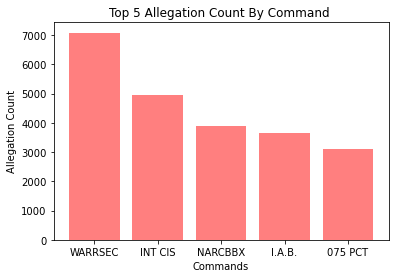

In [17]:
#create a list of numbers that associate with the top 5 commands
top5Counts = [7082, 4958, 3888, 3647, 3090]
#create and label boxplot of the top 5 commands
x_axis = np.arange(len(top5Counts))
plt.bar(x_axis, top5Counts, color='r', alpha=0.5, align="center")
tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, ["WARRSEC", "INT CIS", "NARCBBX", "I.A.B.", "075 PCT"])
plt.title("Top 5 Allegation Count By Command ")
plt.xlabel("Commands")
plt.ylabel("Allegation Count")
plt.show()


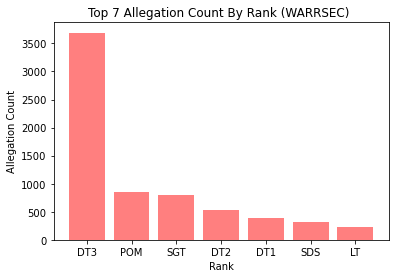

In [18]:
#get the count of allegations per rank within the warrsec command
countRank = WARRSEC_df["Rank"].value_counts()
#countRank
#create a list of the top 7 ranks
top7Counts = [3691, 860, 801, 528, 389, 310, 234]
#create and label the boxplot
x_axis = np.arange(len(top7Counts))
plt.bar(x_axis, top7Counts, color='r', alpha=0.5, align="center")
tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, ["DT3", "POM", "SGT", "DT2", "DT1", "SDS", "LT"])
plt.title("Top 7 Allegation Count By Rank (WARRSEC) ")
plt.xlabel("Rank")
plt.ylabel("Allegation Count")
plt.show()


In [19]:
#get the count of allegations per rank within the int cis command
countRank = intCIS_df["Rank"].value_counts()
#countRank

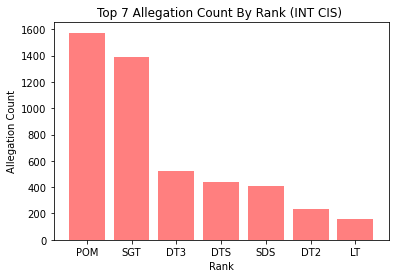

In [20]:
#create a list of the top 7 ranks
top7Counts = [1574, 1392, 525, 436, 407, 236, 159]
#create and label the boxplot
x_axis = np.arange(len(top7Counts))
plt.bar(x_axis, top7Counts, color='r', alpha=0.5, align="center")
tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, ["POM", "SGT", "DT3", "DTS", "SDS", "DT2", "LT"])
plt.title("Top 7 Allegation Count By Rank (INT CIS) ")
plt.xlabel("Rank")
plt.ylabel("Allegation Count")
plt.show()

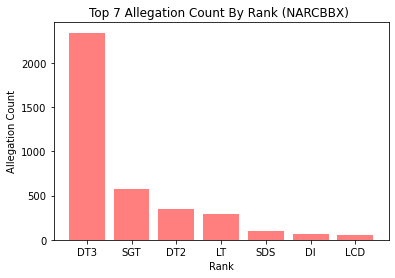

In [21]:
#get the count of allegations per rank within the narcbbx command
countRank = NARCBBX_df["Rank"].value_counts()
#countRank
#create a list of the top 7 ranks
top7Counts = [2344, 572, 345, 294, 102, 67, 58]
#create and label the boxplot
x_axis = np.arange(len(top7Counts))
plt.bar(x_axis, top7Counts, color='r', alpha=0.5, align="center")
tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, ["DT3", "SGT", "DT2", "LT", "SDS", "DI", "LCD"])
plt.title("Top 7 Allegation Count By Rank (NARCBBX) ")
plt.xlabel("Rank")
plt.ylabel("Allegation Count")
plt.show()

In [22]:
#get the count of allegations per rank within the IAB command
countRank = IAB_df["Rank"].value_counts()
#countRank

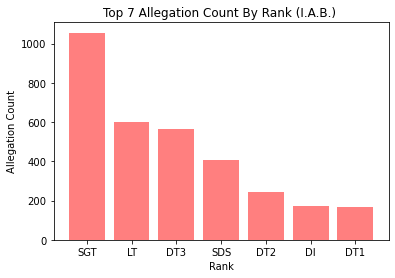

In [23]:
#create a list of the top 7 ranks
top7Counts = [1055, 601, 563, 409, 241, 170, 168]
#create and label the boxplot
x_axis = np.arange(len(top7Counts))
plt.bar(x_axis, top7Counts, color='r', alpha=0.5, align="center")
tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, ["SGT", "LT", "DT3", "SDS", "DT2", "DI", "DT1"])
plt.title("Top 7 Allegation Count By Rank (I.A.B.) ")
plt.xlabel("Rank")
plt.ylabel("Allegation Count")
plt.show()

In [24]:
#get the count of allegations per rank within the 075 pct command
countRank = pct_df["Rank"].value_counts()
#countRank

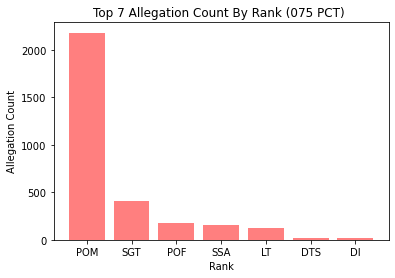

In [25]:
#create a list of the top 7 ranks
top7Counts = [2179, 407, 173, 157, 126, 23, 16]
# create and label the barplot
x_axis = np.arange(len(top7Counts))
plt.bar(x_axis, top7Counts, color='r', alpha=0.5, align="center")
tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, ["POM", "SGT", "POF", "SSA", "LT", "DTS", "DI"])
plt.title("Top 7 Allegation Count By Rank (075 PCT) ")
plt.xlabel("Rank")
plt.ylabel("Allegation Count")
plt.show()

In [26]:
#get the allegation count for per rank in all commands togehter
rankCount = data["Rank"].value_counts()
#rankCount
#create a dataframe for the top 5 ranks
pct_df = data.loc[(data["Rank"] == "POM") | (data["Rank"] == "DT3") | (data["Rank"] == "SGT") | (data["Rank"] == "LT")
                |  (data["Rank"] == "POF"), :]

rankCount = pct_df["Rank"].value_counts()
rankCount

POM    122872
DT3     52341
SGT     50632
LT      21896
POF     18075
Name: Rank, dtype: int64

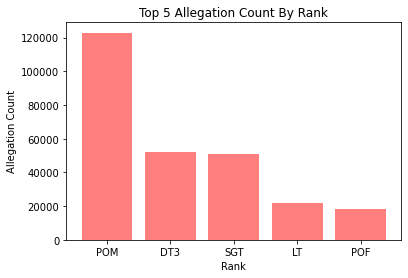

In [27]:
#create a list of numbers that associate with the top 5 ranks
top5Counts = [122872, 52341, 50632, 21896, 18075]
#create and label a boxplot for the top 5 rank by allegation count across all commands
x_axis = np.arange(len(top5Counts))
plt.bar(x_axis, top5Counts, color='r', alpha=0.5, align="center")
tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, ["POM", "DT3", "SGT", "LT", "POF"])
plt.title("Top 5 Allegation Count By Rank")
plt.xlabel("Rank")
plt.ylabel("Allegation Count")
plt.show()

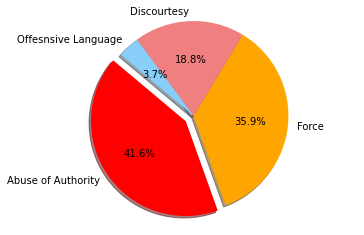

In [28]:
#get the count of allegations for each fado type
fadoTypeCounts = data["FADO Type"].value_counts()
#fadoTypeCounts
#create lists for type of fado, count of fado, and colors for pie chart
labels = ["Abuse of Authority", "Force", "Discourtesy", "Offesnsive Language"]
counts = [120852, 104243, 54740, 10814]
colors = ["red", "orange", "lightcoral", "lightskyblue"]
#create a pie chart for the percentage of each fado type
explode= (0.1, 0.0, 0.0, 0.0)
#plt.title("FADO Type")
plt.pie(counts, labels=labels, explode = explode, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=140 )
plt.axis("equal")
plt.show()


In [29]:
#get the count of allegations in 2015
df08 = data2.loc[(data2["Year"] == 2008.0) , :]
#df15
count08 = df08["Year"].value_counts()
count08

2008.0    9637
Name: Year, dtype: int64

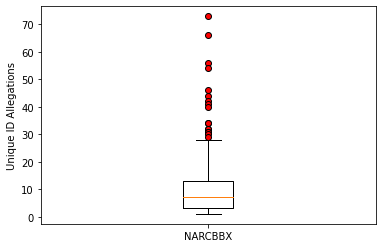

In [30]:
#get the data of from only narcbbx
narcBBX = data2.loc[(data2["Command"] == "NARCBBX")]
#get the count of allegations per unique id within the selected command
data = narcBBX['Unique Id'].value_counts()

#create the boxplot
fig1, ax1 = plt.subplots()
red_circle = dict(markerfacecolor='r')
ax1.set_ylabel('Unique ID Allegations')
ax1.boxplot(data, flierprops=red_circle)
plt.xticks([1], ["NARCBBX"])
plt.show()

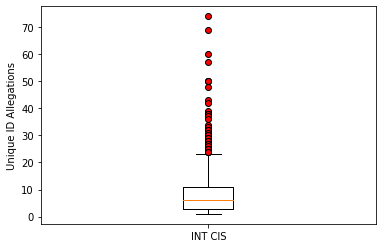

In [31]:
#get the data of from only Int CIS
intCis = data2.loc[(data2["Command"] == "INT CIS")]
#get the count of allegations per unique id within the selected command
data = intCis['Unique Id'].value_counts()

#create the boxplot
fig1, ax1 = plt.subplots()
red_circle = dict(markerfacecolor='r')
ax1.set_ylabel('Unique ID Allegations')
ax1.boxplot(data, flierprops=red_circle)
plt.xticks([1], ["INT CIS"])
plt.show()



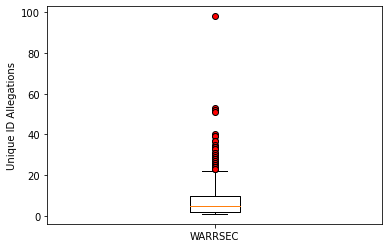

In [32]:
#get the data of from only WARRSEC
warr = data2.loc[(data2["Command"] == "WARRSEC")]
#get the count of allegations per unique id within the selected command
data = warr['Unique Id'].value_counts()

#create the boxplot
fig1, ax1 = plt.subplots()
red_circle = dict(markerfacecolor='r')
ax1.set_ylabel('Unique ID Allegations')
ax1.boxplot(data, flierprops=red_circle)
plt.xticks([1], ["WARRSEC"])
plt.show()



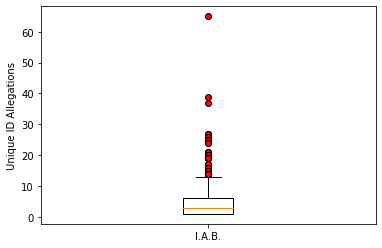

In [33]:
#get the data of from only IAB
IAB = data2.loc[(data2["Command"] == "I.A.B.")]
#get the count of allegations per unique id within the selected command
data = IAB['Unique Id'].value_counts()

#create the boxplot
fig1, ax1 = plt.subplots()
red_circle = dict(markerfacecolor='r')
ax1.set_ylabel('Unique ID Allegations')
ax1.boxplot(data, flierprops=red_circle)
plt.xticks([1], ["I.A.B."])
plt.show()

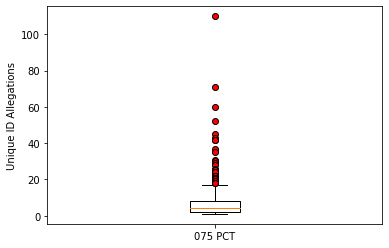

In [34]:
#get the data of from only 075 PCT
pct = data2.loc[(data2["Command"] == "075 PCT")]
#get the count of allegations per unique id within the selected command
data = pct['Unique Id'].value_counts()

#create the boxplot
fig1, ax1 = plt.subplots()
red_circle = dict(markerfacecolor='r')
ax1.set_ylabel('Unique ID Allegations')
ax1.boxplot(data, flierprops=red_circle)
plt.xticks([1], ["075 PCT"])
plt.show()